# Predictive Insights through Classification Analysis
---

Statistical Learning encompasses a set of mathematical and computational methodologies for data analysis, particularly within the scope of supervised learning. The central aim of supervised learning is to forecast or approximate outputs based on one or multiple inputs.

These inputs are commonly denoted as predictors, independent variables, or features, while the resultant outputs are designated as response variables or dependent variables.

In situations hwere the response variable is a numerical metric quantifying a certain attribute, it falls under the category of a `regression` problem. When the response variable classifies data into distinct groups, it falls under `classification` problem.



The aim of this case study is to set up a classifier such that when its presented with a new observation whose category is not known, it will attempt to assign that observation a category, based on the observations for which it does know the true category.

This specific method is known as the `k-Nearest Neighbors` classifier.

Given a positive integer k, and a new data point, it first identifies those k points in the data that are nearest to the point and classifies the new data point as belonging to the most common class among those k neighbors.

## Task Description
---

**Task 1 - Writing Functions**
    - Calculating Euclidean distance between two points
    - Calculating the mode of a sequence of votes
    - Identifying nearest k neighbors for a given point
    - Predicting class labels


**Task 2 - SciKitLearn**
    - Comparing the homemade kNN classifier with the classifer provided by SciKitLearn


**Task 3 - Classification of Wines**
    - Applying the homemade kNN classifier to classify wines into `high_quality` or `low_quality`
    based on supplementary information about wines

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Finding Distance Between Two Points
---

- The function `distance` takes in two points, (x1,y1) and (x2,y2), and calculates the Euclidean distance between them. The x and y coordinates of the points are passed as arguments to the function.

- Inside the function, the two points are converted to numpy arrays for easier manipulation. The difference between the two points is then calculated by subtracting the first point from the second.

- The x and y components of the difference are then calculated and stored in separate variables. Using the Pythagorean theorem, the distance between the two points is calculated and stored in the dist variable.

- Finally, the function returns the calculated distance.

In [2]:
def distance(point1, point2):
    """
    Calculates the Euclidean distance between two points 'point1' and 'point2'.

    Inputs:
        point1 (tuple) - coordinates of point 1
        point2 (tuple) - coordinates of point 2

    Returns:
        dist (float) - Distance between the two points.
    """

    # Converting points to numpy arrays for easier computation
    point1_array = np.array(point1)
    point2_array = np.array(point2)

    # Calculating difference between the two points
    diff = point2_array - point1_array

    # Extracting the x and y differences
    delta_x = diff[0]
    delta_y = diff[1]

    # Calculating the Euclidean distance
    dist = np.sqrt((delta_x ** 2) + (delta_y ** 2))
    
    return dist

In [3]:
point1 = (0,0)
point2 = (1,1)

print("The distance between {} and {} is {} units.".format(point1,point2,distance(point1,point2)))

The distance between (0, 0) and (1, 1) is 1.4142135623730951 units.


## Majority Vote
---

The objective of the next task is to find the occurrence frequency of individual elements within an array or sequence of votes and ascertain the predominant element in the sequence. This can be accomplished by systematically iterating through the sequence and maintaining a record of the occurrence count of each element in a dictionary.

Subsequently, the element with the highest frequency can be identified by locating the key associated with the maximum value within the dictionary. The function's outcome will contain both the most prevalent element within the sequence and it's corresponding frequency.

The `majority_vote` function takes an input sequence of votes and returns the most common element(s) in the sequence.

- The function first initializes an empty dictionary, `vote_count`, to keep track of the count of each vote. It then iterates through the input sequence and checks if the current vote is already in the dictionary. If the vote is already present, its count is incremented by one. If it is not present, it is added to the dictionary with an initial count of one.

- After counting the votes, the function initializes an empty list, `winners`, to keep track of the most common element(s) in the sequence. The function then finds the maximum count of any vote in the sequence using the max function with the `values()` method of `vote_count`. It then iterates through the items in `vote_count` and adds the vote(s) with the maximum count to the winners list.

- Finally, the function randomly selects and returns one of the elements in the winners list using the `random.choice` method.

In [4]:
def majority_vote(input_sequence):
    """
    The function takes in a sequence and returns the element that occurs with highest frequency.
    In case of multiple elements having the same frequency, an element is returned
    randomly.
    
    Input:
        input_sequence (list) - sequence of elements
        
    Returns:
        A randomly selected element from the most common 
        element(s) in the input sequence.
    """
    
    vote_count = {}
    
    for vote in input_sequence:
        
        if vote in vote_count:
            
            vote_count[vote] += 1
            
        else:
            
            vote_count[vote] = 1
            
    winners = []
    
    max_count = max(vote_count.values())
    
    for a_vote, a_count in vote_count.items():
        
        # checking whether current vote has maximum votes
        if a_count == max_count:
            winners.append(a_vote)
    
    return random.choice(winners)

In [5]:
vote_list = [np.random.randint(5,10) for x in range(25)]
print(vote_list)
majority_vote(vote_list)

[9, 8, 8, 5, 6, 9, 6, 5, 8, 9, 7, 5, 6, 8, 7, 7, 9, 7, 5, 8, 5, 6, 8, 5, 7]


8

The element that exhibits the highest frequency within a sequence is denoted as the `mode` in statistical terminology.

The `Scipy` module provides a designated method named `mode`, which facilitates the extraction of the element with the maximum frequency from an array.

In [6]:
import scipy.stats as ss

In [7]:
ss.mstats.mode(vote_list)

ModeResult(mode=array([5.]), count=array([6.]))

In the provided array `vote_list`, the value `5` recurs 6 times, establishing it as the mode. 

Both the values `5` and `8` appear an equal number of times. The method for mode calculation within the `Scipy` module prefers the smallest mode in such scenarios. Consequently, the value `5` is returned as the mode.

The function `majority_vote_short` accepts a sequence of votes as its input and utilizes the `mode` function from the `mstats` module within the `Scipy` library to determine the element that appears most frequently within the sequence. The output of the function corresponds to the identified mode value.

In [8]:
def majority_vote_short(votes):
    """
    Returns the most common element in votes.
    
    Parameters:
        votes (list) - A list of votes to calculate
        the mode
        
    Returns:
        The most common element in the input sequence.
        In case of multiple elements having same frequency, only one is returned.
    """
    
    # mode() method returns both the element and it's count
    mode, count = ss.mstats.mode(votes)
    
    return mode

## Finding Nearest Neighbors
---

The `knn_classify` function serves as a classifier aimed at identifying the k nearest neighbors for a specific fixed point within a set of input points. The purpose of this classifier is to determine which points among the input set are the closest neighbors to the point that needs to be classified.

The function calculates the distances between the fixed point and all other input points, storing these distances within a numpy array. It then employs the `argsort` method from `NumPy` to arrange these distances and generate an array of indices that indicate the sorting order.

The final outcome of the function is a one-dimensional numpy array containing the indices of the k nearest neighbors to the fixed point. The array is arranged in ascending order of proximity.

In [9]:
def knn_classify(fixed_point,input_points,k=5):
    """
     Finding the k nearest neighbors for fixed_point and returning
     their indices.
     
    Inputs:
        fixed_point (tuple) - Representing the fixed point as (x,y).
        
        input_points (np.ndarray) - A 2-dimensional numpy array representing 
        the input points with shape (n,2), where n is the number of points. 

        k (int) - Representing the number of neighbors to be considered.
        Default value is 5.

    Returns:
    A 1-dimensional numpy array containing the indices of the
    k nearest neighbors to the fixed_point.
    """
    
    dist_array = np.zeros(input_points.shape[0])
    
    # looping over all points
    for ele in range(len(dist_array)):
        
        # computing the distance between given point p and every other point
        dist_array[ele] = distance(fixed_point,input_points[ele])
        
    # sorting distances and returning those k points
    # that are nearest to point p
    ind = np.argsort(dist_array)
    return ind[0:k]            

#### Generating a set of sample values for the purpose of function testing

In [10]:
demo_points = np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
fixed_point = np.array([2.5,2])

#### Producing a graphical representation of the generated values for visual inspection

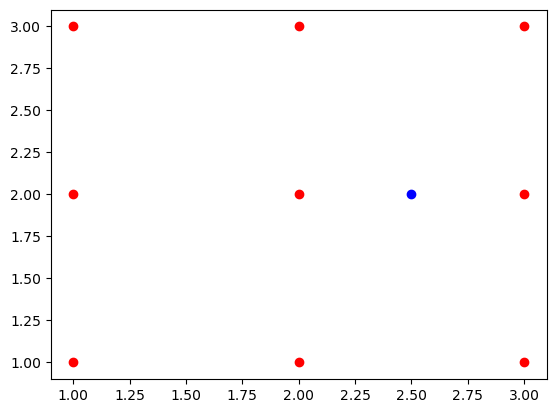

In [11]:
plt.plot(demo_points[:,0],demo_points[:,1],'ro')
plt.plot(fixed_point[0],fixed_point[1],'bo');

Upon observing the plot, it becomes evident that the points closest to the coordinates `(2.5,2)` are `(2,2)` and `(3,2)`. These specific points correspond to the fourth and seventh columns in the `demo_points` array.

In [12]:
distances = knn_classify(fixed_point,demo_points,3)

Invoking the `knn_classify` function with the aim of identifying the three closest points to the `fixed_point` yield the indices `[4, 7, 3]`.

The indices `4` and `7` correspond to the points `(2,2)` and `(3,2)` in the array, respectively. The newly included index `3` corresponds to the point `(2,1)`.

In [13]:
print("Indices: {}\n".format(distances))
print("Nearest points: \n{}".format(demo_points[distances]))

Indices: [4 7 3]

Nearest points: 
[[2 2]
 [3 2]
 [2 1]]


Upon successfully identifying the nearest points for our designated `fixed_point`, the subsequent task involves making predictions based on these points.

In [14]:
def knn_predict(fixed_point,input_points,outcomes,k=5):
    """ 
    The function takes in a fixed point that needs to be classified, along with other
    input points to predict the category of the fixed point.
    
    Inputs:
        fixed_point (tuple) - Representing the fixed point as (x,y)
        
        input_points (np.ndarray) - A 2-dimensional numpy array representing 
            the input points with shape (n,2), where n is the number of points
        
        outcomes (np.ndarray) - A vector containing the class (category) to which
            the input points belong
        
        k (int) - Representing the number of neighbors to be considered.
            Default value is 5.
        
    Returns:
        Predicted class for fixed_point
    """
    
    # finding the indices of the nearest points
    # using the function `knn_classify()`
    near_ind = knn_classify(fixed_point,input_points,k)
    
    return majority_vote(outcomes[near_ind])

#### Testing

A new point with x-coordinate `2.2` and y-coordinate `2.7` is given as an input to `knn_predict` function.

There are two distinct classes: `class 0` and `class 1`

The function predicts the point `(2.2, 2.7)` to belong to `class 1`.

In [15]:
outcome = np.array([0,0,0,0,1,1,1,1,1])
fixed_point = (2.2,2.7)

knn_predict(fixed_point,demo_points,outcome)

1

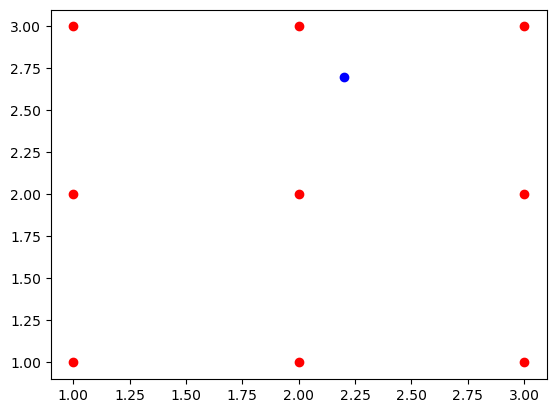

In [16]:
plt.plot(demo_points[:,0],demo_points[:,1],"ro");
plt.plot(fixed_point[0],fixed_point[1],"bo");

## Generating Synthetic Data
---

A function will be created to produce two distinct endpoint data, with the initial endpoints originating from `class 0`, and the subsequent endpoints originating from `class 1`.

Predictors will be generated from two bivariate normal distributions. The first distribution will generate observations attributed to `class 0`, while the second distribution will generate observations attributed to `class 1`.

While generating observations from `class 0`, a mean of 0 and standard deviation of 1 are given as arguments. This procedure is used to generate a matrix with 5 rows and 2 columns.

In [17]:
ss.norm(0,1).rvs((5,2))

array([[-0.06948328, -0.86392108],
       [-0.72973888, -1.43149421],
       [-0.0925142 , -1.38692498],
       [-0.63198487,  0.44071621],
       [ 0.08017696,  1.71131749]])

While generating observations from `class 1`, the mean is simply changed to 1.

In [18]:
ss.norm(1,1).rvs((5,2))

array([[ 1.0725673 ,  0.21035099],
       [ 0.84669646,  0.92317506],
       [ 1.30226997,  1.52077415],
       [-0.18620658, -0.60748232],
       [ 1.07049822,  1.05285019]])

The process of generating synthetic data is facilitated by the implementation of `generate_data` function.

This function generates synthetic data points from two bivariate normal distributions and assigns class labels to them. The parameter `n` specifies the number of data points to create for each class. The resulting tuple contains the generated data points and their corresponding class labels.

In [20]:
def generate_data(n=50):
    """
    Generate two sets of points from bivariate normal distributions
    along with their corresponding class labels.
    
    Input:
        n (int) - Number of data points to create, Default: 50
        
    Returns:
        A tuple containing the generated points and their associated
        class labels.
        
        - points (np.ndarray) : 2-dimensional numpy array representing 
        the generated data points

        - outcomes (np.ndarray) : 1-dimensional numpy array containing 
        class labels for the points
    """
    
    # data belonging to class 0
    category1 = ss.norm(0,1).rvs((n,2))
    
    # data belonging to class 1
    category2 = ss.norm(1,1).rvs((n,2))
    
    points = np.concatenate((category1,category2),axis=0)
    outcomes = np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

In [21]:
data_points, labels = generate_data(40)

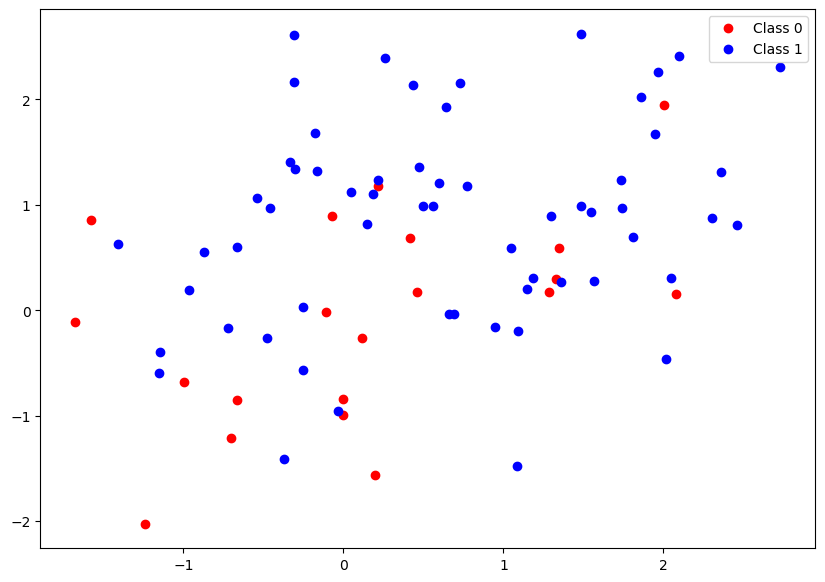

In [24]:
plt.figure(figsize=(10,7))

# variable for splitting the synthetic data into respective class
split_point = 20

# the first half of the data contains values for class 0
# column 1 contains the x values, column 2 contains the y values
plt.plot(data_points[:split_point,0], data_points[:split_point,1],'ro',label = "Class 0");

# the second half of the data contains values for class 1
# column 1 contains the x values, column 2 contains the y values
plt.plot(data_points[split_point:,0], data_points[split_point:,1],'bo', label = "Class 1");
plt.legend();

## Prediction Grid
---

The purpose of the prediction grid is to analuze a specified region within the predictor space and determine the predicted class for each poiny in the grid using the `knn_classifier` function.

In [30]:
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """
    Classifies each point on the prediction grid.
    
    Inputs:
        predictors (np.ndarray) - 2D array containing the points to be predicted
        
        outcomes (np.ndarray) - Vector containing the class labels
        
        limits (tuple) - Contains the dimensions of the prediction grid
        
        h (float) - Step size
        
        k (int) - Number of points to be considered while making prediction
        
    Returns:
        A tuple (new_x, new_y, prediction_grid)
        
        new_x (np.ndarray) - Contains x-values for grid points
        
        new_y (np.ndarray) - Contains y-values for grid points
        
        prediction_grid (np.ndarray) - Contains class labels for predictors
    """
    
    (x_min,x_max,y_min,y_max) = limits
    
    x_vals = np.arange(x_min,x_max,h)
    y_vals = np.arange(y_min,y_max,h)
    
    new_x , new_y = np.meshgrid(x_vals,y_vals)
    
    prediction_grid = np.zeros(new_x.shape, dtype = int)
    
    # looping over x-values and y-values
    # Using the knn_predict() function to predict class label
    # Predicted class labels are stored in prediction_grid variable
    for i,x in enumerate(x_vals):
        
        for j,y in enumerate(y_vals):
            
            point = np.array([x,y])
            prediction_grid[j,i] = knn_predict(point,predictors,outcomes,k)
            
    return (new_x,new_y,prediction_grid)

## Plotting Prediction Grid
---

The `plot_prediction_grid` function takes in the coordinates `xx` and `yy` of the prediction grid and the associated `prediction_grid` containing class labels. It uses the `ListedColormap` from `matplotlib.colors` to define colormaps for background and observations.

The function creates a scatterplot of predictor points with color-coded outcomes and overlays the background prediction grid using the defined colormaps. The resulting plot visualizes the KNN predictions for each point on the grid.

In [27]:
def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    
    from matplotlib.colors import ListedColormap
    
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap, s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

Experimenting with various values ok `k` leads to varying outcomes.

For large values of `k`, the demarcation line between distinct colors, referred to as the `decision boundary`, exhibits greater smoothness compared to instances where smaller `k` values are employed. In essence, the parameter `k` influences the level of smoothness in the model's fit to the data.

In [28]:
predictors, outcomes = generate_data()

In [31]:
limits = (-3,4,-3,4)
h = 0.1
(xx,yy,prediction_grid) = make_prediction_grid(predictors,outcomes,limits,h,50)

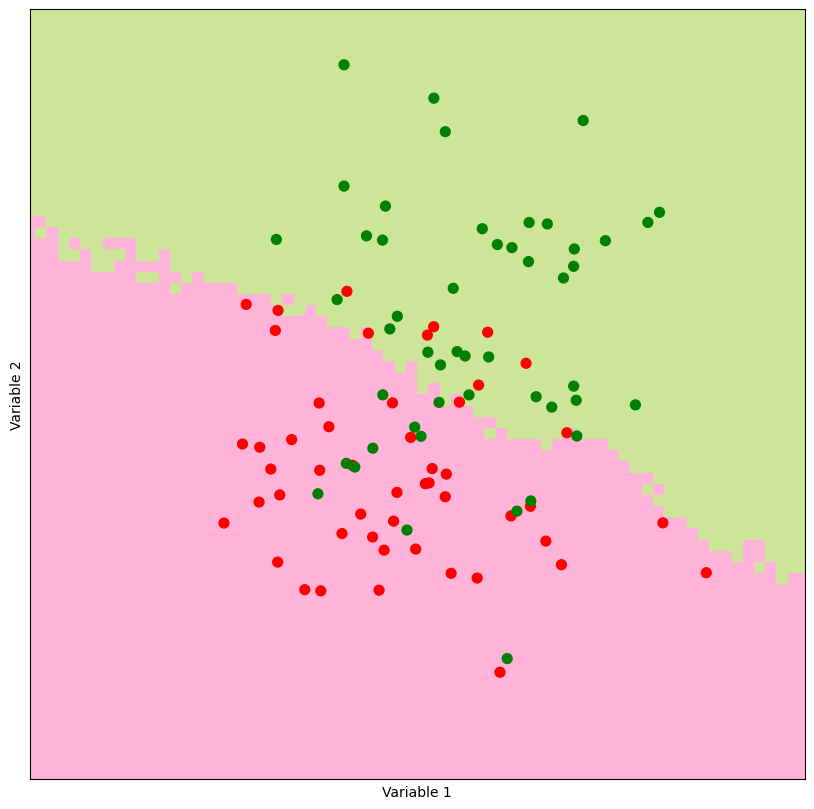

In [32]:
plot_prediction_grid(xx,yy,prediction_grid)

## SciKitLearn
---

The next objective is to compare the performance of the homemade `knn_classifier` and the classifier provided by `SciKitLearn`.

`SciKitLearn` is an open-source Python library dedicated to machine learning tasks.

The SciKitLearn classifier involves a dataset of 150 iris flowers, evenly distributed among three species, each containing 50 flowers. The covariates for each flower include sepal length, sepal width, petal length, and petal width.

In [33]:
from sklearn import datasets
iris = datasets.load_iris()

In [34]:
iris['data'].shape

(150, 4)

The iris dataset consists of 150 rows and 4 columns, with each column representing a covariate.

In this particular instance, we focus on the first two covariates for analysis.

In [37]:
predictors = iris.data[:,0:2]
iris_outcomes = iris.target

The code block below creates a scatter plot by plotting points with different colors based on their classes in the iris dataset. The x-coordinate values are taken from the first column of `predictors` array, and the y-coordinate values are taken from the second column.

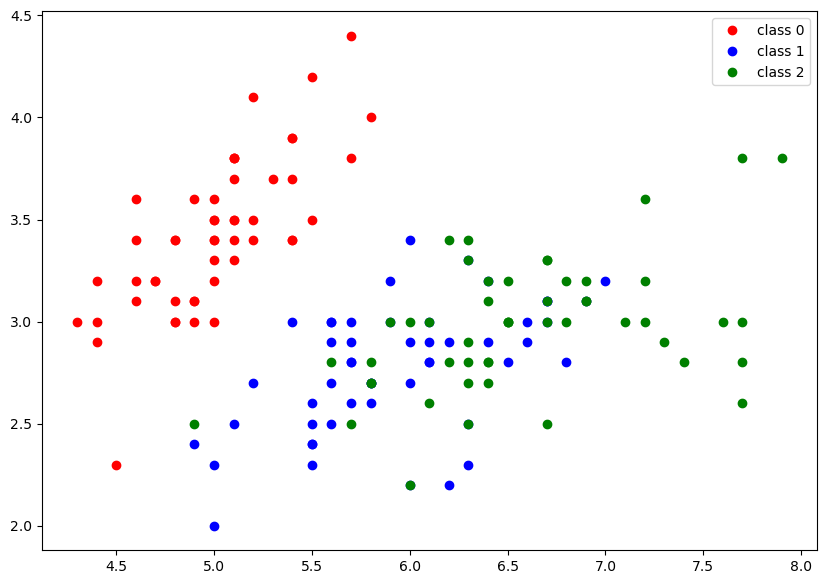

In [38]:
plt.figure(figsize=(10,7))
plt.plot(predictors[iris_outcomes==0][:,0],predictors[iris_outcomes==0][:,1],"ro", label = 'class 0');
plt.plot(predictors[iris_outcomes==1][:,0],predictors[iris_outcomes==1][:,1],"bo", label = 'class 1');
plt.plot(predictors[iris_outcomes==2][:,0],predictors[iris_outcomes==2][:,1],"go", label = 'class 2');
plt.legend();

A prediction grid is generated for the iris dataset using the `make_prediction_grid` function. Then, the `plot_prediction_grid` function is used to visualize the predictions made by `knn_classifier` on this grid.

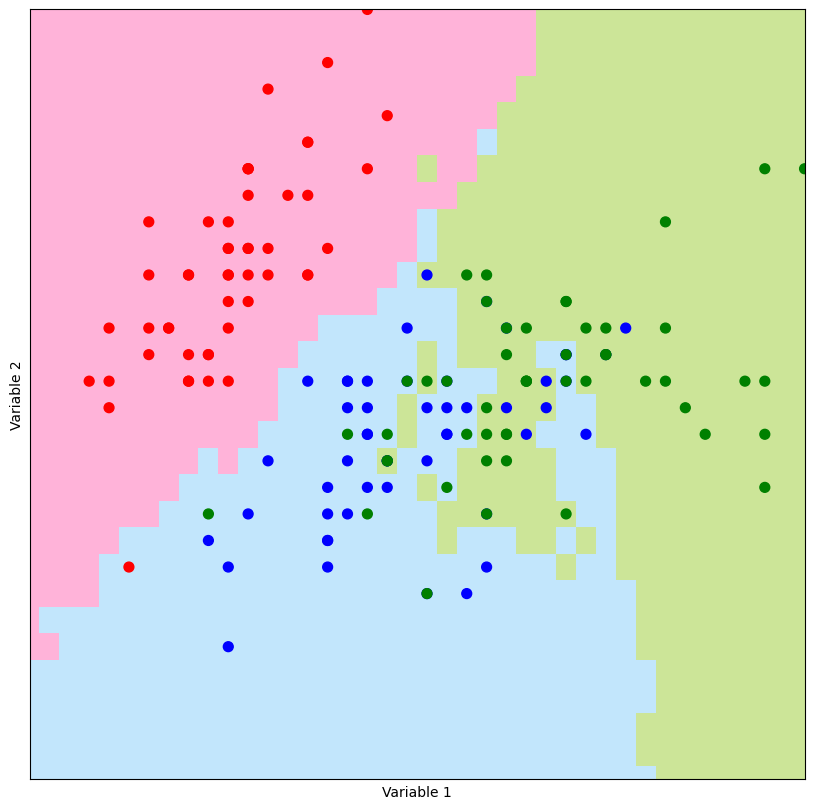

In [39]:
#k = 5
limits = (4,8,1.5,4.5)
h = 0.1
(m1,m2,new_grid) = make_prediction_grid(predictors,outcomes,limits,h,5)
plot_prediction_grid(m1,m2,new_grid)

Let's test the performance of `knn_classify` against the classifier provided by SciKitLearn.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

After importing the classifier, the parameter for the number of neighbors is set to 5.

The `.fit` method is then applied to train the model, utilizing the `predictors` and `iris_outcomes` as input data.

Subsequently, the predictions are acquired by employing the `.predict` method and are stored in the variable named `sk_predictions`.

In [41]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, iris_outcomes)
sk_predictions = knn.predict(predictors)

In [42]:
my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])

To perform a comparison between predictions, it is necessary to assess the degree of agreement between `sk_predictions` and `my_predictions`.

This comparison yields a boolean array, the mean of which is computed, treating `True` as 1 and `False` as 0.

In [44]:
print("Classifier Acc: {}".format(100 * np.mean(sk_predictions == my_predictions)))

Classifier Acc: 97.33333333333334


Furthermore, it is possible to examine the frequency of agree between predictions generated by both the `knn_classifer` and the `SciKit classifer`, in comparison with the observed outcomes.

In [45]:
print('SciKit Acc: {}'.format(100 * np.mean(sk_predictions == outcomes)))
print('knn_classifier Acc: {}'.format(100 * np.mean(my_predictions == outcomes)))

SciKit Acc: 83.33333333333334
knn_classifier Acc: 84.66666666666667


The observed outcomes of the data show that the predictions made by the `SciKit classifier` exhibits an agreement rate of 83%. In contrast, the predictions of the `knn_classifier` align with the observed outcomes approximately 85% of the time.

## Classification of Wines
---

This case study consists of analysis of a dataset comprising various wines categorized as either `high_quality` or `low_quality`. The application of k-Nearest Neighbors classification aims to ascertain whether supplementary information about the wine facilitates accurate predictions regarding its classification as `high_quality` or `low_quality`.

In [52]:
import numpy as np, random, scipy.stats as ss
import pandas as pd
import os

### Functions
---

- `majority_vote_fast` takes a sequence of votes as input and calculates the mode of the sequence, which represents the most common value. The calculated mode value is returned as the result.

- `distance` computes the Euclidean distance between two points, `p1` and `p2`, represented as arrays.

- `find_nearest_neighbors` given a point `p`, an array of points `points` and an optional value `k`, the function computes the distances between the point `p` and all other points in `points` array.

- `knn_predict` predicts the class label for a new point `p` using k-Nearest Neighbors classification.

In [49]:
def majority_vote_fast(votes):
    """ 
    Calculate the mode of a sequence of votes.

    Inputs:
        votes (np.ndarray) - A sequence of votes

    Returns:
        mode: The mode value for the sequence of votes
    """

    mode, count = ss.mstats.mode(votes)
    return mode

def distance(p1, p2):
    """ 
    Calculate the Euclidean distance between two points.

    Inputs:
        p1 (np.ndarray) - The coordinates of the first point
        p2 (np.ndarray) - The coordinates of the second point

    Returns:
        distance (float) - The Euclidean distance between p1 and p2
    """

    return np.sqrt(np.sum(np.power(p2 - p1, 2)))

def find_nearest_neighbors(p, points, k=5):
    """
    Find the indices of the nearest k neighbors to a 
    given point.

    Inputs: 
        p (np.ndarray) - The coordinates of the reference point

        points (np.ndarray) - 2-dimensional array representing 
        the coordinates of all points

        k (int) - The number of neigbors to find. Default is 5

    Returns:
        indices (np.ndarray) - An array of indices corresponding to the 
        k nearest neighbors
    """

    distances = np.zeros(points.shape[0])
    for i in range(len(distances)):
        distances[i] = distance(p, points[i])
    ind = np.argsort(distances)
    return ind[:k]

def knn_predict(p, points, outcomes, k=5):
    """ 
    Predict the class label for a given point using k-Nearest Neighbors.

    Inputs:
        p (np.ndarray) - Coordinates of the point to predict

        points (np.ndarray) - 2-dimensional array representing coordinates
        of all points

        outcomes (np.ndarray) - An array of class labels corresponding to
        each point

        k (int) - Number of neighbors to consider. Default value is 5.

    Returns:
        predicted_label - The predicted class label for the given
        point
    """
    
    ind = find_nearest_neighbors(p, points, k)
    return majority_vote_fast(outcomes[ind])[0]

### Task 1
---

- Using the `pd.read_csv` function to read the dataset as pandas dataframe.

In [75]:
relative_path = "./"

file_loc = os.path.join(relative_path,'wine.csv')

In [76]:
data = pd.read_csv(file_loc, index_col = False)

In [79]:
data = data.drop(data.columns[0], axis = 1)
data.head()

,Unnamed: 1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


### Task 2
---

- Creating a new column named `is_red` in the dataframe, based on the values in the `color` column.
    - Setting the value to `1` if `color` is `red`
    - Setting the value to `0` if `color` is `white`
    

- Dropping the columns `color`, `quality` and `high_quality` from the dataframe.

- Storing the resulting dataframe containing all numeric data in a new pandas dataframe named `numeric_data`.

In [81]:
is_red = np.zeros(data.shape[0])

In [83]:
for ind, color in enumerate(data['color']):

    if color == 'red':

        is_red[ind] = 1


A NumPy array called `is_red` is initialized, containing all zeros and having length equivalent to the number of rows in the dataset.

Looping over each row in `color` column of dataset, the value of the `ind` element in `is_red` is changed to `1` is the conditional is fulfilled.

In [84]:
is_red

array([1., 1., 1., ..., 0., 0., 0.])

In [128]:
data1 = data.drop(['Unnamed: 1','color','quality','high_quality'],axis=1)

In [130]:
numeric_data = pd.concat([data1,pd.Series(is_red)],axis=1)
numeric_data.columns = list(data1.columns) + ['is_red']

In [131]:
numeric_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1.0


Counting the number of red wines in the dataset.

In [132]:
len(numeric_data[numeric_data['is_red'] == 1.0])

1599

### Task 3
---

 - Scale the Data: It involves subtracting the mean of each variable (column) from its values and then dividing by the standard deviation.
    * Using the `scale` function from `sklearn.preprocessing` on `numeric_data`
    * The original variables names are preserved by passing the parameter `columns = numeric_data.columns`


- Extract Principal Components: It is a dimensionality reduction technique that captures the most significant patterns of variation in data.
    * Importing `PCA()` from `sklearn.decomposition`
    * Creating an instance of `PCA()` class and storing it in variable `pca`
    * Using `fit_transform()` method on scaled data to extract the first two principal components

In [133]:
# scaling the data
import sklearn.preprocessing

column_list = list(numeric_data.columns)
scaled_data = sklearn.preprocessing.scale(numeric_data)
numeric_data = pd.DataFrame(scaled_data, columns=column_list)


In [134]:
numeric_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,1.75019
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,1.75019
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,1.75019
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,1.75019


In [135]:
# extracting PCA
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(numeric_data)

In [136]:
principal_components[:5,:]

array([[ 3.73606125, -0.14116701],
       [ 3.68227354,  0.56082363],
       [ 3.66368602,  0.32778184],
       [ 2.47936351,  1.82578374],
       [ 3.73606125, -0.14116701]])

### Task 4
---

The goal of this task is to examine how well the high and low-quality wines are separated when represented in this reduced-dimensional space.

- Accessing the first two principal components and storing them in seperate variables `x` and `y`

- Using `plt.scatter` function from `matplotlib.pyplot` to create the scatter plot

- High quality wines are plotted using `red`, Low quality wines are plotted using `blue`

In [137]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.backends.backend_pdf import PdfPages

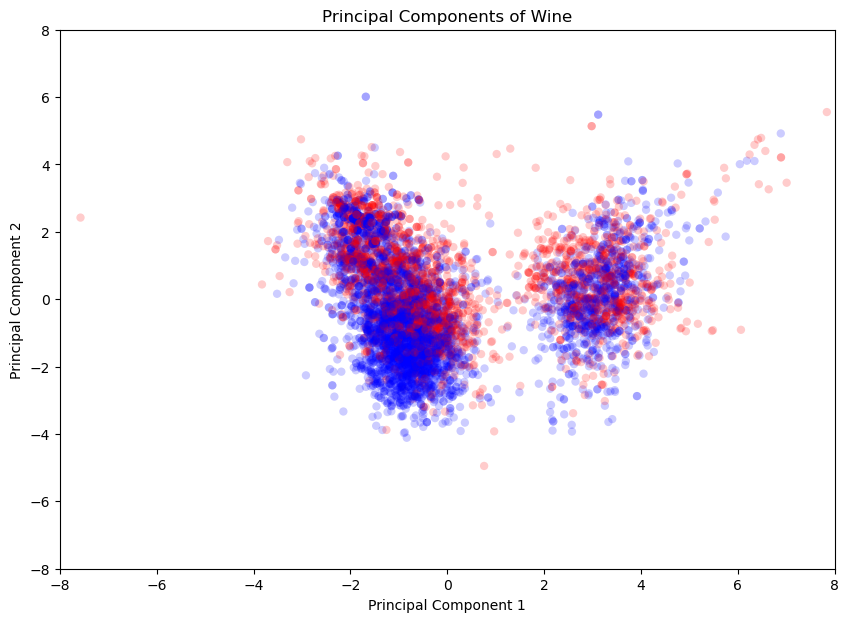

In [141]:
observation_colormap = ListedColormap(['red', 'blue'])
x = principal_components[:,0]
y = principal_components[:,1]

plt.figure(figsize=(10,7))
plt.title("Principal Components of Wine")
plt.scatter(x, y, alpha = 0.2,
    c = data['high_quality'], cmap = observation_colormap, edgecolors = 'none')
plt.xlim(-8, 8); plt.ylim(-8, 8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

### Task 5
---

The goal of this task is to develop a function to determine the accuracy between two lists of the same size. The function will be used to assess how well the predictions align with the actual outcomes.

- Defining a function named `accuracy` that takes two arguments: `predictions` and `outcomes`, calculating the accuracy as the ratio of the count of equal elements to the total number of elements.


In [143]:
np.random.seed(1)

x = np.random.randint(0,2,1000)
y = np.random.randint(0,2,1000)

In [144]:
def accuracy(predictions, outcomes):
    """
    Calculating the accuracy between predicted and actual
    outcomes.

    Inputs:
        predictions (list): A list of predicted outcomes
        outcomes (list): A list of actual outcomes

    Returns:
        float: Percentage of elements that are equal 
        between the two lists
    """

    check_list = []

    for ind, val1 in enumerate(predictions):

        if val1 == outcomes[ind]:

            check_list.append(1)

    percent_same = 100 * (len(check_list) / len(predictions))

    return percent_same

In [145]:
print(accuracy(x,y))

51.5


### Task 6
---

* Utilizing the `accuracy` function to calculate the accuracy of predicting low quality for all wines

First, an array of zeros is created with the same length as the `high_quality` column in the dataset. This array represents the predicted outcomes.

This array of zeros is passed along with `data['high_quality']` to the `accuracy` function.

In [147]:
accuracy(np.zeros(len(data['high_quality'])), data['high_quality'])

36.69385870401724

The calculated accuracy of 36.69% is the percentage of wines for which the simple prediction rule matches the actual outcomes in the dataset.

### Task 7
---

In this task, the k-Nearest Neighbors (kNN) classifier from the `scikitlearn` library will be implemented to make predictions about the wine quality of our dataset.

- Using the `knn_predict(numeric_data)` to predict whether each wine in the dataset is of high or low quality. These predictions are stored in `library_predictions`

- Calculating the accuracy of predictions



In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(numeric_data, data['high_quality'])

KNeighborsClassifier()

In [155]:

library_predictions = knn.predict(numeric_data)
value_test = accuracy(library_predictions,data['high_quality'])

print(value_test)

84.14652916730799


### Task 8
---

- Setting the random number generator using `random.seed(123)` for consistent results.

- Selecting 10 rows from the data using `random.sample(range(n_rows), 10)` method. This selection of random rows is stored in `selection`.



In [157]:
random.seed(123)

n_rows = data.shape[0]
selection = random.sample(range(n_rows), 10)


In [158]:
selection

[428, 2192, 714, 6299, 3336, 2183, 882, 312, 3105, 4392]

### Task 9
---

- For each predictor `p` in `predictors[selection]`, using the `knn_predict` function to predict the qualityt of each wine in the prediction set. These predictions are stored as an array in `my_predictions`

- Utilizing the `accuracy` function to compare the results obtained from `my_predictions` and the selected rows from the `high_quality` variable in `data` dataframe

In [160]:
predictors = np.array(numeric_data)
training_indices = [i for i in range(len(predictors)) if i not in selection]
outcomes = np.array(data["high_quality"])

In [163]:
my_predictions = np.array([knn_predict(p, predictors[training_indices,:], outcomes[training_indices],5) for p in predictors[selection]])

percentage = accuracy(my_predictions, np.array(data['high_quality'][selection]))

print(percentage)


70.0


The classifier identified the five nearest neighbors from the training dataset to generate each prediction. The predictions were stored in `my_predictions` using a list comprehension. The accuracy of these predictions was compared against the actual outcomes.

The accuracy was calculated using the `accuracy` function, which measures the proportion of similar elements between the `my_predictions` array and the corresponding subset of dataset's `high_quality` variable. The resultant accuracy percentage was determined to be 70%.


---
